In [1]:
import numpy as np
import sympy as sp
from scipy import signal
import matplotlib.pyplot as plt

Ref: Manolakis, D.G. and Ingle, V.K., 2011. Applied digital signal processing: theory and practice. Cambridge University Press.

This Butterworth low-pass filter tool contains implementation of methods to design low-pass Butterworth filters. The methods are implemented similar to Matlab design procedures. Two commands; Buttord and Butter are implemented.

In this notebook, we use to demonstrate and verify the filter usage. 

### ANALOG FILTER SPECIFICATION FOR LOW-PASS FILTERING

The filters are usually designed in continous time domain by specifiying the filter performance. The passband and stopband frequencies $W_p$ and $W_s$ and the ripple magnitutes for these regions are specified. In the following cell, we use Python scipy.signal library to implemenet a low-pass Butterworth filter which yields the order and cut-off frequency and the order of the filter>

In [2]:
# N  : order of the filter
# Wc : cut-off frequency
# Wp : passpand frequency [rad/sec] 
# Ws : stopband frequency [rad/sec]
# Ap : passband ripple magnitude [dB] maximum loss in passband
# As : stopband ripple magnitude [dB] minimum attenuation in stopband


Wp = 2
Ws = 3
Ap = 6
As = 20


N, Wc = signal.buttord(Wp, Ws, Ap, As, True)

In [3]:
N, Wc

(5, 1.793051458184297)

In [4]:
b, a = signal.butter(N, Wc, 'low', True)
b

array([18.53376991])

In [5]:
a

array([ 1.        ,  5.80243641, 16.83413412, 30.18446873, 33.44942446,
       18.53376991])

In [6]:
w, h = signal.freqs(b, a, np.logspace(-2, 3, 500))

Text(0, 0.5, 'Amplitude [dB]')

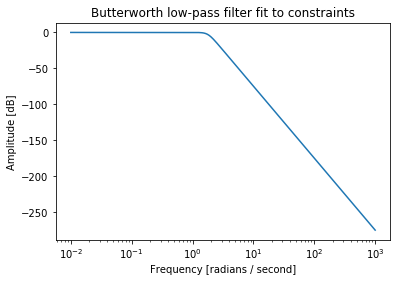

In [7]:
plt.plot(w, 20 * np.log10(abs(h)))
plt.xscale('log')
plt.title('Butterworth low-pass filter fit to constraints')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')

### IMPLEMENTING FILTER TRANSFER FUNCTIONS

Once the order and cut-off frequency of the filter are defined, it is trivial to find roots of the filter transfer function in continuous time. The polynomials of the continuous and discrete time transfer functions are required. We implement a poly method that takes the roots of the polynomial and yields the coefficient of it. 

$roots = [r_1, \:, r_2, \:, \cdots, r_n]$

Poly(roots) = $(x-r_1)(x-r_2)\cdots(x-r_n)=  a_nx^n + a_{n-1}x^{n-1} + \cdots + a_0$ 



In [8]:
def poly(r):
    ''' Returns the polynomial coefficients given the roots'''
    n = len(r)
    c = [0] * (n+1)
    c[0] = 1 
    
    for j in range(n):
        for i in range(j, -1, -1):           
            c[i+1] = c[i+1] - r[j]*c[i]
    
    return c

In [9]:
## Test the poly function by defining real and complex roots sets. 

In [10]:
roots = [1, 2, 3, 5]

In [11]:
roots_complex = [-1+2j, -1-2j]

In [12]:
poly(roots)

[1, -11, 41, -61, 30]

In [13]:
x = sp.symbols('x')
exp = 1

for i in range(len(roots)):
    exp *= (x-roots[i])

exp.expand()

x**4 - 11*x**3 + 41*x**2 - 61*x + 30

In [14]:
poly(roots_complex)

[1, (2+0j), (5+0j)]

In [16]:
exp = 1

for i in range(len(roots_complex)):
    exp *= (x-roots_complex[i])

exp.expand()

x**2 + 2.0*x + 5.0

### TEST OUTPUT SIGNAL 

In [27]:
xtest = 0.8 * np.sin(np.linspace(1, 100, 1000) ) 
xtestn = xtest + np.random.randn(1000) 

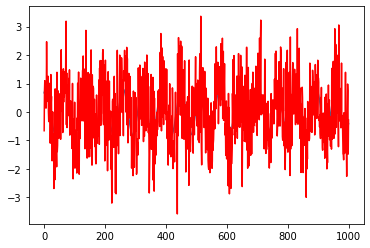

In [28]:
plt.plot(xtest)
plt.plot(xtestn, 'r')

In [61]:
b, a = signal.butter(2, 0.5, 'low', analog = False)

In [62]:
b

array([0.29289322, 0.58578644, 0.29289322])

In [63]:
a

array([ 1.00000000e+00, -1.66533454e-16,  1.71572875e-01])

In [57]:
output = signal.filtfilt(b, a, xtestn)

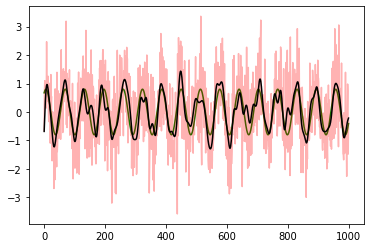

In [48]:
plt.plot(xtest, 'g')
plt.plot(xtestn, 'r', alpha = 0.3)
plt.plot(output, 'k')


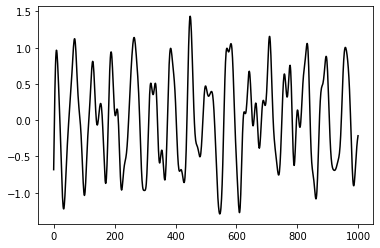

In [49]:
plt.plot(output, 'k')
